# Numpy

Numpy (Numerical Python) is Python's library for numerical data, and provides a wealth of functionality for working with array data.

Numpy features include:
  * A fast and efficient multidimensional array object ndarray
  * Functions for performing computations on arrays
  * Tools for reading and writing array-based datasets to disk
  * Linear algebra operations, and random number generation

Our first step is to **import** the package (note the "import as" shortcut):

In [1]:
import numpy as np

**Python note:**  Instead of the above import, we could have done ``from numpy import *``, which would have made every statement shorter by not having to write ``np.`` before each Numpy command.  That is not a good idea, as the Numpy namespace conflicts with built in Python functions like ``min`` or ``max``.

Arrays are the standard data containers in Numpy, and can have any number of dimensions.

Let's create a one dimensional array:

In [2]:
my_array = np.array([1, 2, 3])
my_array

array([1, 2, 3])

Now how is that different from a Python list, which we could have created as:

In [3]:
my_list = [1, 2, 3]

Numpy arrays are more efficient in terms of storage (why?) and allow faster manipulations of numeric data.
Furthermore, using Numpy's C API, libraries written in C or Fortran, can operate on the data stored in a NumPy array without needing to copy data. 

Let's demonstrate the speed advantage of Numpy arrays:

In [4]:
import numpy as np
my_array = np.arange(1000000)
my_list = list(range(1000000))
# Note: why not simply do my_list = range(10000000)?

In [5]:
%timeit my_array2 = my_array * 2

1000 loops, best of 3: 1.33 ms per loop


In [6]:
%timeit my_list2 = [x * 2 for x in my_list]

10 loops, best of 3: 47.4 ms per loop


This clearly demonstrates the power of using Numpy arrays over Python lists.

**Note about timing Python code**
``%time`` is another magic command that can be used to measure the execution time of code snippets.  ``%timeit`` results are generally more accurate which is a result of the fact that ``%timeit`` does some clever things under the hood to prevent system calls from interfering with the timing. For example, it prevents cleanup of unused Python objects (known as garbage collection) which might otherwise affect the timing. For this reason, ``%timeit`` results are usually noticeably faster than ``%time`` results (see [this article](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) for more information about profiling Python code).

### Numpy ndarrays

Numpy ndarrays enable you to perform mathematical operations on entire arrays in a single operation without requiring for loops.  This is called *vectorization*.

For example:

In [7]:
data = np.array( [ [1,2,3], [4,5,6] ])
data

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
data * 10    # multiply array by a scalar
data + data  # add arrays

array([[ 2,  4,  6],
       [ 8, 10, 12]])

You can also perform Boolean operations on arrays:

In [9]:
a1 = np.array([[1., 2., 3.], [4., 5., 6.]])
a2 = np.array([[0., 4., 1.], [7., 2., 12.]])
a2 > a1

array([[False,  True, False],
       [ True, False,  True]])

Every array has a shape, which is a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:


In [10]:
data.shape
data.dtype

dtype('int64')

While it's clear what Numpy does when asked to add a scalar to an array or add two arrays of the same size, check what happens when adding two arrays of unequal size, e.g. add a one dimensional array to a two dimensional array

In [11]:
# define two arrays, one with a shape (2,3), 
# and another which is one dimensional.
# what will its size need to be for the operation to work?
# what is Numpy doing in this case?

In [12]:
A = np.array([[1,1,1,1],[2,2,2,2]])
B = np.array([3,3,3,3])
C = np.array([4,4,4,4])
print("A+B:\n",A+B)
print("A+C:\n",A+C)

A+B:
 [[4 4 4 4]
 [5 5 5 5]]
A+C:
 [[5 5 5 5]
 [6 6 6 6]]


In [13]:
A = np.array([[1,1,1],[2,2,2]])
B = np.array([3,3,3])
C = np.array([4,4,4])
print("A+B:\n",A+B)
print("A+C:\n",A+C)

A+B:
 [[4 4 4]
 [5 5 5]]
A+C:
 [[5 5 5]
 [6 6 6]]


<font color='red'>
    
* LET: $A \epsilon R^{nxm}$
    
* LET: $B \epsilon R^{1xk}$
    
If $(k=1)$: The element of B is added to all of the elements of A

If $(k=m)$: The row B, is added to each row of A

than the matrices can be broadcast togeather.

GENERALLY: In order to know if broadcasting is going to work, you need to look at the dimensions of the two operands. Each of their dimensions need to be equal, or one of their dimensions can be a one. 
</font> 

Note that Numpy inferred the type from the data that we provided.  You can check what happens if there are floats in the input to the array constructor.

In [14]:
arr1 = np.array([6, 7.5, 8, 0, 1])
arr1,arr1.dtype
arr2 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr2,arr2.dtype

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]), dtype('int64'))

In [15]:
print("ndim  (1):",arr1.ndim)
print("shape (1):",arr1.shape)
print("ndim  (2):",arr2.ndim)
print("shape (2):",arr2.shape)

ndim  (1): 1
shape (1): (5,)
ndim  (2): 2
shape (2): (2, 4)


Contrast this with the Python ``len`` builtin:

In [16]:
len(arr1), len(arr2)

(5, 2)

<font color='red'>
    * len(array): gives the length of the first dimension
</font>

### Data types

Each array has a dtype associated with it, which is the type used to store the elements of the array.
The numerical dtypes are named as follows: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in Numpy as ``float64``.



In [17]:
a1 = np.array([1, 2, 3], dtype=np.float64)
a2 = np.array([1, 2, 3], dtype=np.int32)
a1.dtype
a2.dtype

dtype('int32')

What would be the resulting data type for an array that contains strings and numbers?

In [18]:
# create an array that contains strings and numbers and check its data type

In [19]:
a = np.array([1,2,3,"1","12","123"])
a.dtype

dtype('<U21')

<font color=red>
    * uses a unicode character type
</font>

Some functions for creating arrays:

In [20]:
a = np.zeros((2,2))      # Create an array of zeros
print(a)

b = np.ones((2,2))       # Create an array of ones
print(b)

d = np.eye(2)            # Create a 2x2 identity matrix
print(d)

e = np.random.random((3,3))
print(e)  

f = np.arange(2, 3, 0.1)
print(f)

g = np.linspace(1., 4., 6)
print(g)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[1. 0.]
 [0. 1.]]
[[0.57329665 0.0515955  0.07447179]
 [0.9729863  0.40266119 0.25623456]
 [0.98790916 0.77169389 0.186893  ]]
[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
[1.  1.6 2.2 2.8 3.4 4. ]


### Sidenote - getting **help** on python objects:

For getting help e.g. on the Numpy **linspace** function you can do one of the following:

```python
?np.linspace
```

or

```python
help(np.linspace)
```

In [21]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

### Array indexing and slicing

We'll begin with one dimensional arrays:

In [22]:
a = np.array([2,3,4])
print(a[0], a[1], a[2])
a[0] = 5                  # Change an element of the array
a

2 3 4


array([5, 3, 4])

Can you explain what's happening in the following piece of code?

In [23]:
b = a
b[0] = 1234
a
b

array([1234,    3,    4])

In [24]:
a = np.arange(10)
a
# indexing a single element
a[5]
# a slice:
a[5:8]
a[5:8] = 12
a

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Let's see how slices behave in Numpy:

In [25]:
a_slice = a[5:8]
a_slice

array([12, 12, 12])

In [26]:
a_slice[1] = 12345
a

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

Numpy has been designed to be able to work with very large arrays, so eagerly copying data could cause severe performance and memory problems.

If you want a copy of a slice instead of a view, you will need to explicitly copy it using e.g. ``arr[5:8].copy``.


#### Two dimensional arrays

Let's look at two dimensional arrays.

In [27]:
b = np.array([[1,2,3],[4,5,6]])
b,b.shape

print(b[0, 0], b[0, 1], b[1, 0])
print(b[0][0], b[0][1], b[1][0])


1 2 4
1 2 4


The latter form of indexing works, because each row of a two dimensional array is an array as well:

In [28]:
a = b[1]
a

array([4, 5, 6])

## Array indexing


In [29]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a[0][1]

2

To access the first row in the data matrix:

In [30]:
row = a[0]    # the first row of X
row, row.shape

(array([1, 2, 3, 4]), (4,))

To access a column of the matrix:

In [31]:
col = a[:, 0]
col, col.shape

(array([1, 5, 9]), (3,))

We can perform slicing on multiple dimensions, creating a submatrix:

In [32]:
submatrix = a[1:3, 1:4]
submatrix, submatrix.shape

(array([[ 6,  7,  8],
        [10, 11, 12]]), (2, 3))

### Advanced indexing

You can index an array using an integer array:


In [33]:
a[ [0, 2] ]   # extract a given set of rows

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [34]:
a[:, [0,2]]  # extract a given set of columns

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

**Question:** does indexing using an array create a copy of the array or simply a view, as in the case of slicing?

<font color=red>
* indexing / fancy indexing do not create views. They instead make copies by value.
    
* you can however use both indexing schemes during variable assighnment in order to change the original array
</font>

In [35]:
a = np.arange(1,6)
b = a[[1,2]]
print("a (before):",a)
print("b (before):",b)
b[0] = 99
print("a (after): ",a)
print("b (after): ",b)

a (before): [1 2 3 4 5]
b (before): [2 3]
a (after):  [1 2 3 4 5]
b (after):  [99  3]


#### Exercises

describe the effect of each of the following slices:

In [36]:
a2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

<font color=red>
1.) return the first 2 rows.
</font>

In [37]:
a2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

<font color=red>
2.) return the first two rows, and all of the columns after the first.
</font>

In [38]:
a2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<font color=red>
3.) return the second row, and the first two columns
</font>

In [39]:
a2d[1, :2]

array([4, 5])

<font color=red>
4.) return the first two rows, and the third column 
</font>

In [40]:
a2d[:2, 2]

array([3, 6])

<font color=red>
5.) return first column
</font>

In [41]:
a2d[:, :1]

array([[1],
       [4],
       [7]])

#### Boolean indexing

In [42]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

array([[-0.58791395,  0.01097025, -0.4368801 ,  0.97536299],
       [ 2.67192951, -0.25100212, -1.15981435, -0.14628716],
       [-0.91122094,  0.72830045, -1.95168616,  1.43035907],
       [-2.24241387, -0.88841876, -1.22559048, -1.39241537],
       [ 0.2050441 , -0.78045492, -0.77712618, -1.03301989],
       [-0.52093969,  0.40168168,  1.16469542, -0.06591651],
       [ 1.00353147, -0.34843644, -0.20046417,  0.40497078]])

In [43]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [44]:
data[names == 'Bob']

array([[-0.58791395,  0.01097025, -0.4368801 ,  0.97536299],
       [-2.24241387, -0.88841876, -1.22559048, -1.39241537]])

In [45]:
cond = names == 'Bob'
data[~cond]

array([[ 2.67192951, -0.25100212, -1.15981435, -0.14628716],
       [-0.91122094,  0.72830045, -1.95168616,  1.43035907],
       [ 0.2050441 , -0.78045492, -0.77712618, -1.03301989],
       [-0.52093969,  0.40168168,  1.16469542, -0.06591651],
       [ 1.00353147, -0.34843644, -0.20046417,  0.40497078]])

In [46]:
cond = (names == 'Bob') | (names == 'Will')
cond
data[cond]

array([[-0.58791395,  0.01097025, -0.4368801 ,  0.97536299],
       [-0.91122094,  0.72830045, -1.95168616,  1.43035907],
       [-2.24241387, -0.88841876, -1.22559048, -1.39241537],
       [ 0.2050441 , -0.78045492, -0.77712618, -1.03301989]])

**Note:** The Python keywords ``and`` and ``or`` do not work with boolean arrays. You need to use & (and) and | (or) instead.


In [47]:
data[data < 0] = 0
data

array([[0.        , 0.01097025, 0.        , 0.97536299],
       [2.67192951, 0.        , 0.        , 0.        ],
       [0.        , 0.72830045, 0.        , 1.43035907],
       [0.        , 0.        , 0.        , 0.        ],
       [0.2050441 , 0.        , 0.        , 0.        ],
       [0.        , 0.40168168, 1.16469542, 0.        ],
       [1.00353147, 0.        , 0.        , 0.40497078]])

In [48]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [2.67192951, 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.40168168, 1.16469542, 0.        ],
       [1.00353147, 0.        , 0.        , 0.40497078]])

#### Reshaping arrays

What is the effect of the following operation?

<font color=red>
    * Reshapes the array so that it now has 5 columns, and 3 rows
</font>

In [49]:
a = np.arange(15).reshape((3, 5))
print(a)
a.shape

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


(3, 5)

Here's where it becomes interesting...

In [50]:
a = np.arange(15).reshape((-1, 5))
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

This is a neat trick:  -1 here means "as many rows as needed"

In [51]:
a.T
a.T.shape

(5, 3)

This is called the "transpose" of a matrix.

In [52]:
np.transpose(a)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in an ndarray. 


In [53]:
a = np.arange(10)
a
np.sqrt(a)
np.exp(a)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [54]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

array([ 0.49028855, -0.34406398, -0.1890217 ,  0.54946406,  0.6122704 ,
        1.12521894,  2.43589401, -0.07137178])

A complete list of ufuncs is available in the [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

### Stacking arrays

In [55]:
x = np.array( [1,2,3,4] )
y = np.array( [5,6,7,8] )
np.vstack([x,y])
np.hstack([x,y])

array([1, 2, 3, 4, 5, 6, 7, 8])

### Avoid loops when you can

Consider the following piece of code:

In [56]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

As we know, loops are slow in python.  There is a much more efficient way of doing this:

In [57]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

This is called **broadcasting**.

In [58]:
points = np.arange(-5, 5, 0.05)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.95, -4.95, -4.95, ..., -4.95, -4.95, -4.95],
       [-4.9 , -4.9 , -4.9 , ..., -4.9 , -4.9 , -4.9 ],
       ...,
       [ 4.85,  4.85,  4.85, ...,  4.85,  4.85,  4.85],
       [ 4.9 ,  4.9 ,  4.9 , ...,  4.9 ,  4.9 ,  4.9 ],
       [ 4.95,  4.95,  4.95, ...,  4.95,  4.95,  4.95]])

In [59]:
z = np.sqrt(xs ** 2 + ys ** 2)

Text(0.5,1,'plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

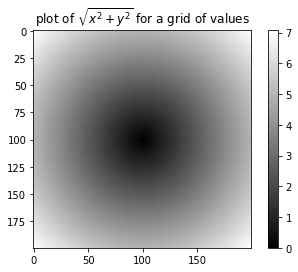

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Expressing Conditional Logic as Array Operations


In [61]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [62]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [63]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [64]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 1, -1)

array([[ 1,  1,  1, -1],
       [-1,  1, -1, -1],
       [ 1,  1, -1,  1],
       [-1,  1, -1,  1]])

### Mathematical and Statistical Methods

In [65]:
a = np.random.randn(5, 4)
a
a.mean()
np.mean(a)
a.sum()

4.810139639261044

In [66]:
a.mean(axis=1)
a.sum(axis=0)

array([0.03463639, 0.84074407, 2.10346508, 1.8312941 ])

In [67]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7])
a.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

### Example:  Random Walks

A random walk in one dimension is a random process where at each step the walker goes a unit step either to the left or to the right.  Random walks have interesting statistical properties that can be investigated by simulating them.

In [68]:
import random
def random_walk(n):
    """Return a list of positions in a random walk"""
    position = 0
    walk = [position]
    for i in range(n):
        position += 2*random.randint(0, 1)-1
        walk.append(position)
    return walk

walk = random_walk(1000)

In [69]:
%timeit random_walk(1000)

1000 loops, best of 3: 1.18 ms per loop


Let's create a more efficient Numpy version:

In [70]:
def random_walk_vectorized(n):
    steps = np.random.choice([-1,+1], n)
    return np.cumsum(steps)

walk = random_walk_vectorized(1000)

In [71]:
%timeit random_walk_vectorized(1000)

The slowest run took 7.55 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 18.8 µs per loop


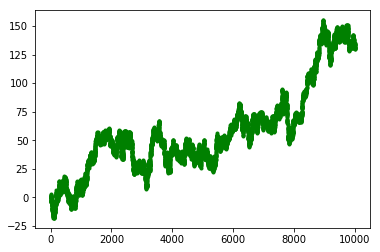

In [72]:
num_steps = 10000
distance = random_walk_vectorized(num_steps)
t = np.arange(num_steps)
plt.plot(t, distance, 'g.')


To investigate statistical properties of random walks we'll need to generate many random walks.  To make this efficient, we'll do it all at once:

In [73]:
np.cumsum?

In [74]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
sq_distance = walks**2
mean_sq_distance = np.mean(sq_distance, axis=0)


Text(0,0.5,'square root of mean square distance')

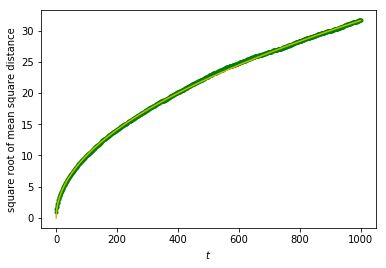

In [75]:
t = np.arange(nsteps)
plt.plot(t, np.sqrt(mean_sq_distance), 'g.',t, np.sqrt(t), 'y-')
plt.xlabel("$t$")
plt.ylabel("square root of mean square distance")

### Numpy documentation

These were some of the basics that are relevant to our course.  You can find more details in the  [Numpy user manual](https://docs.scipy.org/doc/numpy/user/) and the detailed [reference guide](https://docs.scipy.org/doc/numpy/reference).

### Exercises

* Declare a 8x8 matrix and fill it with a checkerboard pattern of zeros and ones


<font color=red>
Solution 1 (list comprehension)
<font>

In [76]:
matrix = np.array([(i+j)%2 for i in range(8) for j in range(8)]).reshape(8,8)
matrix

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

<font color=red>
Solution 2 (stack rows)
<font>

In [77]:
A = np.hstack([np.array([0,1])]*4) # row 1
B = np.hstack([np.array([1,0])]*4) # row 2
matrix = np.vstack([A,B]*4) # stack rows

print("A:",A)
print("B:",B)
print("Matrix:")
print(matrix)

A: [0 1 0 1 0 1 0 1]
B: [1 0 1 0 1 0 1 0]
Matrix:
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


<font color=red>
Solution 3 (slicing)
<font>

In [78]:
A = np.zeros((10,10))
A[1::2, ::2 ] = 1 # set 1's in odd rows
A[::2,  1::2] = 1 # set 1's in even rows
print(A)

[[0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]]


* Create a 10x10 array with random values and find the minimum and maximum values in the entire array, and in each column / row.



In [79]:
A = np.random.randint(1,100,(10,10))
total_max = A.max()
total_min = A.min()

print("A:\n",A)
print()
print("total_max:",total_max)
print("total_min:",total_min)
print("\nmin-row-values:\t", A.min(axis=0))
print("max-row-values:\t", A.max(axis=0))
print("min-col-values:\t", A.min(axis=1))
print("max-col-values:\t", A.max(axis=1))

A:
 [[43 68 82 42 19 96 79 71 71 76]
 [ 1 48 36 34 75 30  8 22 12 39]
 [74 67 32  2 54  4 68 26 75 81]
 [36 37 15 71 94 63 69 97 20 79]
 [64 73 69 56 91 12 89  7 20 68]
 [48 90 34 84 69 60 60 99 93  6]
 [ 5 91  9 51 62 57 91 11 71 29]
 [68 63 66 95 46 83 47 28 19  1]
 [19 23 12 14  4 35 26 54 33 89]
 [34 46 69 79 46 43 94 26 84  5]]

total_max: 99
total_min: 1

min-row-values:	 [ 1 23  9  2  4  4  8  7 12  1]
max-row-values:	 [74 91 82 95 94 96 94 99 93 89]
min-col-values:	 [19  1  2 15  7  6  5  1  4  5]
max-col-values:	 [96 75 81 97 91 99 91 95 89 94]


* Create a matrix with arbitrary floating point numbers, and then normalize its values to be:  (i) between 0 and 1, and (ii) to be between -1 and 1.

In [80]:
np.random.randn?

In [81]:
A = np.random.randn(1,10)
A

array([[-1.26997914, -0.24591186,  0.56327571,  0.17124229, -0.06805987,
        -0.29721556, -0.91287172,  0.08095494,  1.04906754, -0.84874516]])

In [82]:
A += np.fabs(A.min())
A /= np.max(A)
A

array([[0.        , 0.44158977, 0.79052089, 0.62147151, 0.51828162,
        0.41946701, 0.15398889, 0.58253855, 1.        , 0.18164101]])

In [83]:
normalized = A*2 - 1
print("A:\n",A)
print("Normalized:\n",normalized)

A:
 [[0.         0.44158977 0.79052089 0.62147151 0.51828162 0.41946701
  0.15398889 0.58253855 1.         0.18164101]]
Normalized:
 [[-1.         -0.11682047  0.58104179  0.24294302  0.03656324 -0.16106598
  -0.69202222  0.16507709  1.         -0.63671798]]


* Create random vector of size 100, where each element is between 0 and 5, and replace the maximum value by 0

In [84]:
elements = np.random.random([1,100])*5
print("elements:\n",elements)
positions = np.where(elements == np.max(elements))
print("max positions:",positions)

elements:
 [[3.09265068 0.24748037 1.23600736 0.43043515 0.36915672 1.48714039
  0.03102327 4.56703355 0.39297087 4.80461931 2.51892385 4.34419464
  1.43949118 0.20898355 0.14946449 0.44642594 1.20820145 3.54251287
  4.10975802 1.66738867 4.54469243 3.67516313 0.88837843 1.92142455
  3.37027816 3.13793362 0.09346232 3.99766977 0.87226918 4.99138902
  1.76408973 0.38054981 4.45204574 1.03069868 2.271678   0.91876141
  2.0346868  4.06249967 3.57388571 4.29915274 2.51200679 3.33059718
  0.05398966 3.80073915 0.49759294 4.56829935 4.48285308 3.91826456
  0.10644052 4.08950116 0.06807881 4.88639965 4.68756993 3.88353328
  2.46877186 3.87392558 3.04566346 4.74039403 3.38769029 1.37683596
  2.19318266 4.93109943 1.05579622 4.78201807 2.06103883 2.54239423
  4.67789342 4.06067377 0.58137221 3.17955543 1.94077559 4.51434092
  0.49543652 4.12130815 2.11114899 4.4434679  3.76330672 1.06524574
  1.5543962  4.26276505 3.98967992 3.29314271 4.71306695 4.21306964
  2.24617634 0.4297751  2.36450143 2.

<font color=red>
    removing maximum value
    </font>

In [85]:
elements[positions] = 0
print("elements max removed:\n",elements)

elements max removed:
 [[3.09265068 0.24748037 1.23600736 0.43043515 0.36915672 1.48714039
  0.03102327 4.56703355 0.39297087 4.80461931 2.51892385 4.34419464
  1.43949118 0.20898355 0.14946449 0.44642594 1.20820145 3.54251287
  4.10975802 1.66738867 4.54469243 3.67516313 0.88837843 1.92142455
  3.37027816 3.13793362 0.09346232 3.99766977 0.87226918 0.
  1.76408973 0.38054981 4.45204574 1.03069868 2.271678   0.91876141
  2.0346868  4.06249967 3.57388571 4.29915274 2.51200679 3.33059718
  0.05398966 3.80073915 0.49759294 4.56829935 4.48285308 3.91826456
  0.10644052 4.08950116 0.06807881 4.88639965 4.68756993 3.88353328
  2.46877186 3.87392558 3.04566346 4.74039403 3.38769029 1.37683596
  2.19318266 4.93109943 1.05579622 4.78201807 2.06103883 2.54239423
  4.67789342 4.06067377 0.58137221 3.17955543 1.94077559 4.51434092
  0.49543652 4.12130815 2.11114899 4.4434679  3.76330672 1.06524574
  1.5543962  4.26276505 3.98967992 3.29314271 4.71306695 4.21306964
  2.24617634 0.4297751  2.3645014